# Customer Segmentation

### Preparing the Data

In [1]:
# Import the dataset

import pandas as pd

df = pd.read_csv('Bank_Churn.csv')

df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
# Create a subset, excluding unneeded columns

df_subset = df.drop(columns=['CustomerId', 'Surname', 'Exited'])

df_subset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [3]:
# Create a copy of the subset before further processing

df_clean = df_subset.copy()

df_clean.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [4]:
# Count the number of appearance for each qualitative variable

print(df_clean.Geography.value_counts())

print(df_clean.Gender.value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64


In [5]:
# Label encode for Genders

import numpy as np

df_clean.Gender = np.where(df_clean.Gender == 'Female', 1, 0)

In [6]:
# Label encode for Geography

df_clean = pd.get_dummies(df_clean, columns = ['Geography'], dtype='int', prefix ='', prefix_sep='')

In [7]:
df_clean.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1


### Exploring the Data

In [8]:
# Quick overview of the data

df_clean.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.454300,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.501400,0.250900,0.247700
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.500023,0.433553,0.431698
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000
50%,652.000000,0.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,1.000000,0.000000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,1.000000,1.000000,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000


In [ ]:
# Develop a pairplot visual (the graphs go in diagonal, starting from top left)

import seaborn as sns

sns.pairplot(df_clean);

# plt.savefig('pairplot_output.jpg', format='jpg', dpi=300)

In [10]:
# Add a new feature

# df_clean['ProductsPerYear'] = df_clean.NumOfProducts / df_clean.Tenure

df_clean['ProductsPerYear'] = np.where(df_clean.Tenure == 0, df_clean.NumOfProducts, df_clean.NumOfProducts / df_clean.Tenure)

In [11]:
df_clean.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,ProductsPerYear
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0,0.500
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1,1.000
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0,0.375
3,699,1,39,1,0.00,2,0,0,93826.63,1,0,0,2.000
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1,0.500


In [12]:
df_clean.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,ProductsPerYear
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.454300,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.501400,0.250900,0.247700,0.508523
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.500023,0.433553,0.431698,0.507921
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.100000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.200000
50%,652.000000,0.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,1.000000,0.000000,0.000000,0.333333
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,1.000000,1.000000,0.000000,0.666667
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,4.000000


### Clustering the Data

In [13]:
# Scale the data using standardization (so that every column has a mean of 0 and standard deviation of 1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns = df_clean.columns)

df_scaled.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,ProductsPerYear
0,-0.326221,1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,0.997204,-0.578736,-0.573809,-0.016781
1,-0.440036,1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-1.002804,-0.578736,1.742740,0.967674
2,-1.536794,1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,0.997204,-0.578736,-0.573809,-0.262894
3,0.501521,1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0.997204,-0.578736,-0.573809,2.936584
4,2.063884,1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-1.002804,-0.578736,1.742740,-0.016781


In [14]:
df_scaled.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,ProductsPerYear
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,-4.824585e-16,-2.131628e-18,2.318146e-16,-1.078249e-16,-6.252776e-17,1.634248e-17,-5.258016e-17,-7.389644e-17,-2.877698e-17,2.096101e-17,-7.069900e-17,-4.689582e-17,1.957545e-16
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-3.109504e+00,-9.124191e-01,-1.994969e+00,-1.733315e+00,-1.225848e+00,-9.115835e-01,-1.547768e+00,-1.030670e+00,-1.740268e+00,-1.002804e+00,-5.787359e-01,-5.738092e-01,-8.043445e-01
25%,-6.883586e-01,-9.124191e-01,-6.600185e-01,-6.959818e-01,-1.225848e+00,-9.115835e-01,-1.547768e+00,-1.030670e+00,-8.535935e-01,-1.002804e+00,-5.787359e-01,-5.738092e-01,-6.074535e-01
50%,1.522218e-02,-9.124191e-01,-1.832505e-01,-4.425957e-03,3.319639e-01,-9.115835e-01,6.460917e-01,9.702426e-01,1.802807e-03,9.972039e-01,-5.787359e-01,-5.738092e-01,-3.449322e-01
75%,6.981094e-01,1.095988e+00,4.842246e-01,6.871299e-01,8.199205e-01,8.077366e-01,6.460917e-01,9.702426e-01,8.572431e-01,9.972039e-01,1.727904e+00,-5.738092e-01,3.113709e-01
max,2.063884e+00,1.095988e+00,5.061197e+00,1.724464e+00,2.795323e+00,4.246377e+00,6.460917e-01,9.702426e-01,1.737200e+00,9.972039e-01,1.727904e+00,1.742740e+00,6.874403e+00


### Fitting K-Means clustering models on the standardized data with 2 to 15 clusters to create an inertia plot

In [15]:
# Import K-Means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create an empty list to hold many inertia and silhouette values
inertia_values = []
silhouette_scores = []

# Create 2 to 15 clusters, and add the inertia and silhouette scores to the respective lists
for k in range(2, 16):
    kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 42) # Changed from auto to 10
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_, metric='euclidean', sample_size = None))

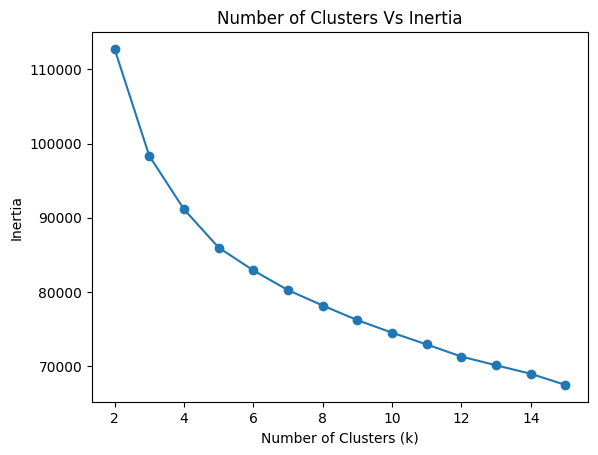

In [16]:
# Plot the data

import matplotlib.pyplot as plt

inertia_series = pd.Series(inertia_values, index = range(2, 16))

inertia_series.plot(marker = 'o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Number of Clusters Vs Inertia');

In [17]:
# Identify the elbow of the inertia plot and fit a K-Means model using that value for K

kmeans5 = KMeans(n_clusters = 5, n_init = 10, random_state = 42)
kmeans5.fit(df_scaled)

KMeans(n_clusters=5, n_init=10, random_state=42)

### Checking the number of customers in each cluster

In [18]:
from collections import Counter

Counter(kmeans5.labels_)

Counter({3: 2343, 2: 2336, 4: 2329, 1: 2305, 0: 687})

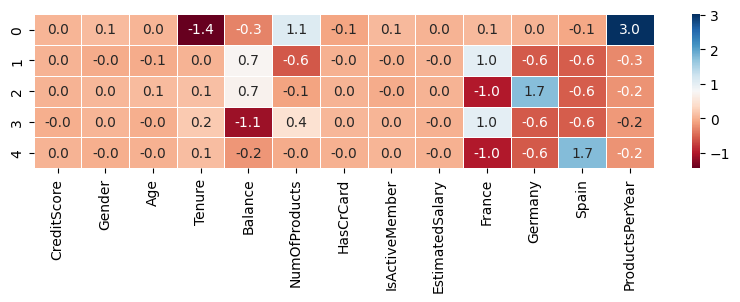

In [21]:
# Create a heatmap of the cluster centers
import seaborn as sns
import matplotlib.pyplot as plt

cluster_centers5 = pd.DataFrame(kmeans5.cluster_centers_, columns = df_scaled.columns)

plt.figure(figsize = (10, 2))
sns.heatmap(cluster_centers5, annot = True, cmap = "RdBu", fmt = ".1f", linewidth = .5);

* 0: These customers are signing up for many products, over a short amount of time
* 1: These are mostly French customers with few products and a high balance
* 2: These are German customers with a high balance
* 3: Mostly French customers with more products, but low balance
* 4: Mostly Spanish customers

### Clustering the Data (Without the Geography field)

In [28]:
# Summary stats by Georgraphy

df_geo = df_subset.copy()

df_geo.Gender = np.where(df_geo.Gender == 'Female', 1, 0)

df_geo.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,1,42,2,0.00,1,1,1,101348.88
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58
2,502,France,1,42,8,159660.80,3,1,0,113931.57
3,699,France,1,39,1,0.00,2,0,0,93826.63
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10


In [32]:
df_geo.groupby('Geography').mean()

# Note that German customers have a high balance

# We can confirm that with some more analysis

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Geography,,,,,,,,,
France,649.668329,0.450937,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814
Germany,651.453567,0.475488,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102
Spain,651.333872,0.439645,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281


In [33]:
df_geo[df_geo.Geography == 'France'].Balance.round(-5).value_counts()

Balance
0.0         2459
100000.0    2123
200000.0     432
Name: count, dtype: int64

In [34]:
df_geo[df_geo.Geography == 'Germany'].Balance.round(-5).value_counts()

Balance
100000.0    2176
200000.0     314
0.0           19
Name: count, dtype: int64

In [35]:
df_geo[df_geo.Geography == 'Spain'].Balance.round(-5).value_counts()

Balance
0.0         1214
100000.0    1040
200000.0     222
300000.0       1
Name: count, dtype: int64

In [37]:
# removing the Georgraphy columns from dataset to cluster the data for a second time

df_scaled_no_geo = df_scaled.drop(columns=['France', 'Germany', 'Spain'])
df_scaled_no_geo.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,ProductsPerYear
0,-0.326221,1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,-0.016781
1,-0.440036,1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,0.967674
2,-1.536794,1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,-0.262894
3,0.501521,1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,2.936584
4,2.063884,1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.016781


In [40]:
# Import K-Means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create an empty list to hold many inertia and silhouette values
inertia_values = []
silhouette_scores = []

# Create 2 to 15 clusters, and add the inertia and silhouette scores to the respective lists
for k in range(2, 16):
    kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 42) # Changed from auto to 10
    kmeans.fit(df_scaled_no_geo)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled_no_geo, kmeans.labels_, metric='euclidean', sample_size = None))

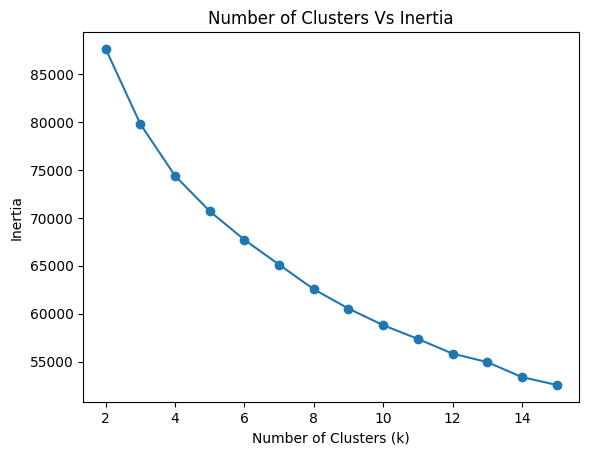

In [41]:
# Plot the data

import matplotlib.pyplot as plt

inertia_series = pd.Series(inertia_values, index = range(2, 16))

inertia_series.plot(marker = 'o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Number of Clusters Vs Inertia');

In [42]:
# Identify the elbow of the inertia plot and fit a K-Means model using that value for K

kmeans4 = KMeans(n_clusters = 4, n_init = 10, random_state = 42)
kmeans4.fit(df_scaled_no_geo)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [43]:
Counter(kmeans4.labels_)

Counter({1: 3223, 2: 2366, 0: 2276, 3: 2135})

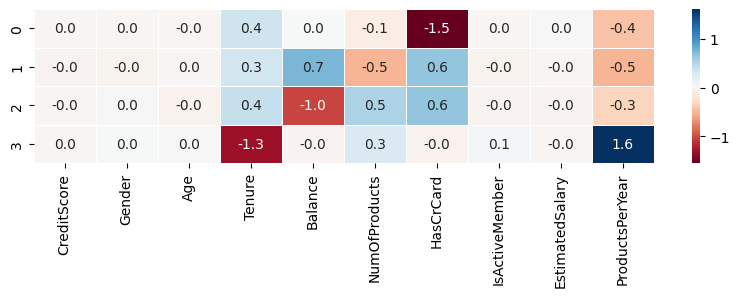

In [45]:
# Create a heatmap of the cluster centers

cluster_centers4 = pd.DataFrame(kmeans4.cluster_centers_, columns = df_scaled_no_geo.columns)

plt.figure(figsize = (10, 2))
sns.heatmap(cluster_centers4, annot = True, cmap = "RdBu", fmt = ".1f", linewidth = .5);

* 0: Customers that don't have a credit card
* 1: These customers have a high balance, fewer products, and they have credit card
* 2: Low balance, more products, and they have credit card
* 3: Customers that have many products in a short amount of time

### Exploring the clusters and making recommendations

In [46]:
# Combine cluster labels with exited fields to make a DataFrame

df_clean.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,ProductsPerYear
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0,0.500
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1,1.000
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0,0.375
3,699,1,39,1,0.00,2,0,0,93826.63,1,0,0,2.000
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1,0.500


In [47]:
df.Exited.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [48]:
kmeans4.labels_

array([2, 3, 2, ..., 0, 2, 1])

In [51]:
# Compile the final DataFrame

df_final = pd.concat([df_clean, df.Exited, pd.Series(kmeans4.labels_, name = 'Cluster')], axis = 1)

df_final.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,ProductsPerYear,Exited,Cluster
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0,0.500,1,2
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1,1.000,0,3
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0,0.375,1,2
3,699,1,39,1,0.00,2,0,0,93826.63,1,0,0,2.000,0,3
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1,0.500,0,1


### Viewing the Churn rate (% of customers that exited) for each cluster

In [53]:
df_final.groupby('Cluster').mean()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,ProductsPerYear,Exited
Cluster,,,,,,,,,,,,,,
0,651.201230,0.455624,38.917838,6.033392,78730.204165,1.480228,0.000000,0.515378,101285.720879,0.500439,0.240334,0.259227,0.286305,0.209578
1,649.375427,0.434068,39.043438,5.981074,123236.381930,1.237357,1.000000,0.499224,99856.400177,0.423829,0.378219,0.197952,0.248201,0.226807
2,650.235418,0.462806,38.515216,6.167794,11731.060702,1.833052,0.999155,0.508453,99487.179958,0.622570,0.066357,0.311074,0.341581,0.164835
3,651.878220,0.474005,39.192974,1.183138,75279.812468,1.689930,0.687588,0.546136,99837.120628,0.485246,0.274473,0.240281,1.323404,0.205621


### Making recommendations

* 0: Customers that don't have a credit card
* 1: These customers have a high balance, fewer products, and they have credit card
* 2: Low balance, more products, and they have credit card
* 3: Customers that have many products in a short amount of time

### Recommendations

### 0: Offer more products; an entry level credit card
### 1: Entice high balance customers to stay (offer new products exclusively for customers with high balance)
### 2: Reward them for their long tenure (low churn rate) (French and Spanish customers)
### 3: Encourage the customers to stay (offer a new product with a long tenure sign on)